# EDA for numerical features


In [95]:
#importing essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [96]:
#reading the cleaned dataseat
data = pd.read_csv('data/dataset_clean.csv')

First, we look at the distributions of the target variable and race in the dataset.

C:\Users\Souradeep\AppData\Local\Temp\ipykernel_9972\2220664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='readmitted', palette='pastel')


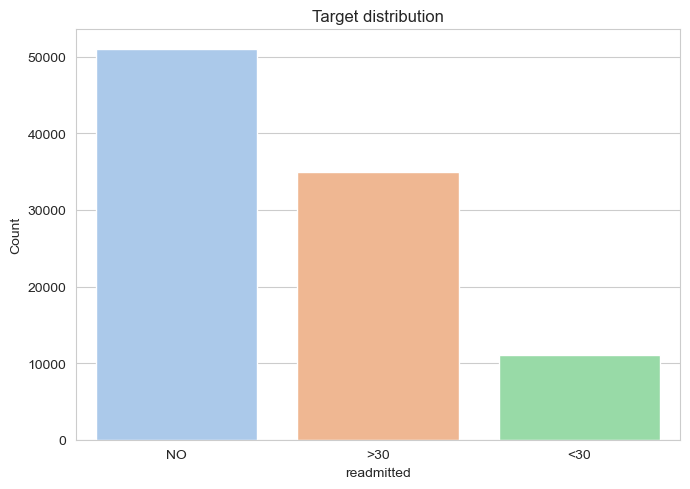

In [108]:
#plotting a histogram for the target variable
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='readmitted', palette='pastel')
plt.title('Target distribution')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('./figs/target_dist.png')
plt.show()

C:\Users\Souradeep\AppData\Local\Temp\ipykernel_9972\3398398333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='race', palette='mako')


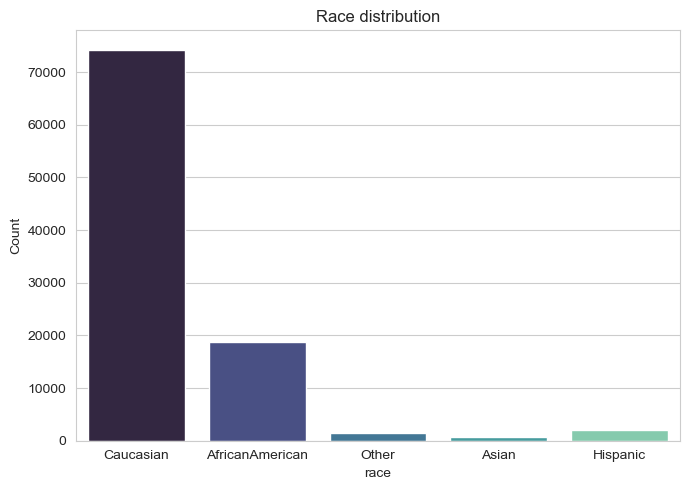

In [109]:
#plotting a histogram for the target variable
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='race', palette='mako')
plt.title('Race distribution')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('./figs/race_dist.png')
plt.show()

In [99]:
#integer encoding for the target
data['target'] = (data['readmitted'] != 'NO').astype('int')

In [100]:
#creating a pandas DataFrame with the numerical features
data_eda_num = data.select_dtypes(include='int64')
data_eda_num = data_eda_num.drop(columns=['patient_nbr', 'encounter_id'])

We will try to visualize the relation between the numerical features and the target. In particular, we will be looking at the readmission frequency. As an example, consider the feture `time_in_hospital`. Let's say that for a particular value of this feature, `time_in_hospital = n`, there are `m` instances where the patient was readmitted. Therefore, the $readmission\ frequency(time\_in \_hospital = n) = m$.

In [101]:
#fumctiom to extract plot data pertaining to specific features
def generate_plot_data(x_var_name, data_eda_num):
    data_eda_num['readmitted_freq'] = data_eda_num.groupby(x_var_name)['target'].transform('sum')
    plot_data = data_eda_num.melt(id_vars=x_var_name, value_vars='readmitted_freq', value_name='y')
    data_eda_num = data_eda_num.drop(columns = 'readmitted_freq')
    plot_data = plot_data.drop(columns='variable')
    plot_data = plot_data.drop_duplicates(subset=[x_var_name, 'y']).sort_values(x_var_name).reset_index(drop=True)

    return(plot_data)

There are several features in the dataset that use industry standard codes. Here is a list:

- Feature: admission_type_id
    - 1 : Emergency
    - 2 : Urgent
    - 3 : Elective
    - 4 : Newborn
    - 5 : Not Available
    - 6 : NULL
    - 7 : Trauma Center
    - 8 : Not Mapped
- Feature: discharge_disposition_id
    - 1 : Discharged to home
    - 2 : Discharged/transferred to another short term hospital
    - 3 : Discharged/transferred to SNF
    - 4 : Discharged/transferred to ICF
    - 5 : Discharged/transferred to another type of inpatient care institution
    - 6 : Discharged/transferred to home with home health service
    - 7 : Left AMA
    - 8 : Discharged/transferred to home under care of Home IV provider
    - 9 : Admitted as an inpatient to this hospital
    - 10 : Neonate discharged to another hospital for neonatal aftercare
    - 11 : Expired
    - 12 : Still patient or expected to return for outpatient services
    - 13 : Hospice / home
    - 14 : Hospice / medical facility
    - 15 : Discharged/transferred within this institution to Medicare approved swing bed
    - 16 : Discharged/transferred/referred another institution for outpatient services
    - 17 : Discharged/transferred/referred to this institution for outpatient services
    - 18 : NULL
    - 19 : Expired at home. Medicaid only, hospice.
    - 20 : Expired in a medical facility. Medicaid only, hospice.
    - 21 : Expired, place unknown. Medicaid only, hospice.
    - 22 : Discharged/transferred to another rehab fac including rehab units of a hospital .
    - 23 : Discharged/transferred to a long term care hospital.
    - 24 : Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
    - 25 : Not Mapped
    - 26 : Unknown/Invalid
    - 30 : Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
    - 27 : Discharged/transferred to a federal health care facility.
    - 28 : Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
    - 29 : Discharged/transferred to a Critical Access Hospital (CAH).
- Feature: admission_source_id
    - 1 : Physician Referral
    - 2 : Clinic Referral
    - 3 : HMO Referral
    - 4 : Transfer from a hospital
    - 5 : Transfer from a Skilled Nursing Facility (SNF)
    - 6 : Transfer from another health care facility
    - 7 : Emergency Room
    - 8 : Court/Law Enforcement
    - 9 : Not Available
    - 10 : Transfer from critial access hospital
    - 11 : Normal Delivery
    - 12 : Premature Delivery
    - 13 : Sick Baby
    - 14 : Extramural Birth
    - 15 : Not Available
    - 17 : NULL
    - 18 : Transfer From Another Home Health Agency
    - 19 : Readmission to Same Home Health Agency
    - 20 : Not Mapped
    - 21 : Unknown/Invalid
    - 22 : Transfer from hospital inpt/same fac reslt in a sep claim
    - 23 : Born inside this hospital
    - 24 : Born outside this hospital
    - 25 : Transfer from Ambulatory Surgery Center
    - 26 : Transfer from Hospice
    
    

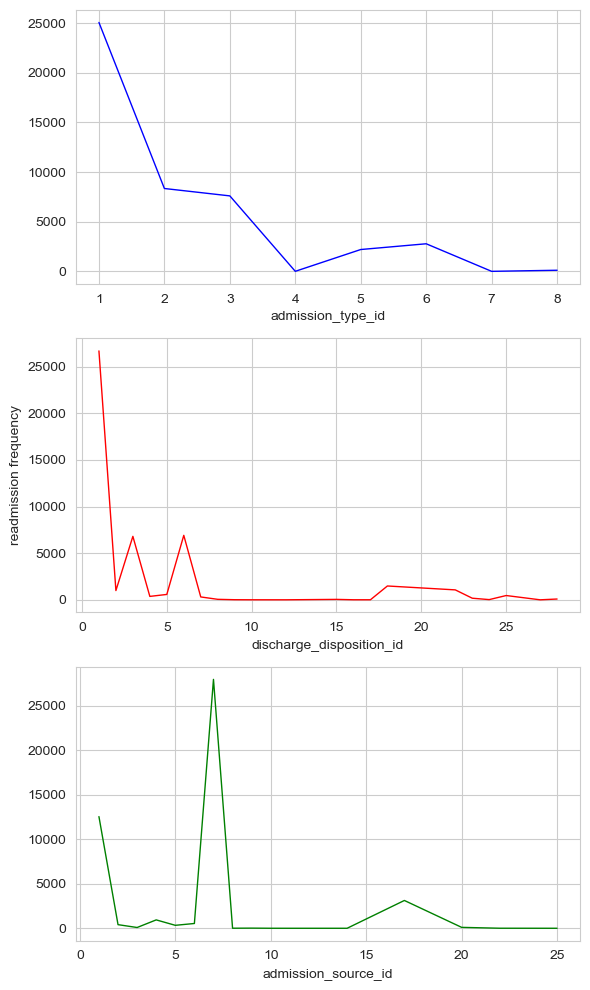

In [110]:
#extracting the plot data
x_var_1 = 'admission_type_id'
x_var_2 = 'discharge_disposition_id'
x_var_3 = 'admission_source_id'
plot_data_1 = generate_plot_data(x_var_1, data_eda_num)
plot_data_2 = generate_plot_data(x_var_2, data_eda_num)
plot_data_3 = generate_plot_data(x_var_3, data_eda_num)

#plotting
fig, (ax_1, ax_2, ax_3) = plt.subplots(nrows = 3, ncols=1, figsize = (6,10))

ax_1.plot(plot_data_1[x_var_1],
         plot_data_1['y'],
         'b',
         linewidth=1)

ax_2.plot(plot_data_2[x_var_2],
         plot_data_2['y'],
         'r',
         linewidth=1)

ax_3.plot(plot_data_3[x_var_3],
         plot_data_3['y'],
         'g',
         linewidth=1)

ax_1.set_xlabel(x_var_1)
ax_2.set_xlabel(x_var_2)
ax_2.set_ylabel("readmission frequency")
ax_3.set_xlabel(x_var_3)

plt.tight_layout()

plt.savefig('./figs/ind_std_codes_v_readmit.png')
plt.show()

del plot_data_1
del plot_data_2
del plot_data_3

Next, we will look at the other (potentially more meaningful) numerical features. These are,
- time_in_hospital: number of days spent in the hospital.
- num_lab_procedures: number of lab tests performed during the encounter.
- num_procedures: number of procedures other than lab tests.
- num_medications: number of distinct generic medications administered.
- num_outpatient: number of outpatient visits of the patient in the year preceding the encounter.
- num_inpatient: number of inpatient visits in the previous year.
- num_emergency: number of emergency visits in the previous year.
- num_diagnoses: number of diagnoses entered into the system.

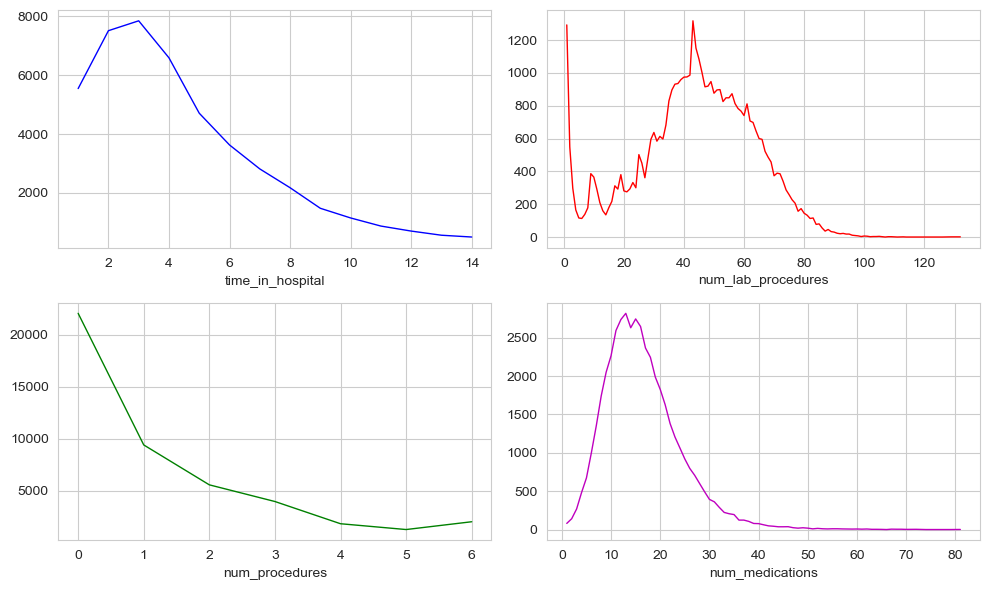

In [112]:
#extracting the plot data
x_var_1 = 'time_in_hospital'
x_var_2 = 'num_lab_procedures'
x_var_3 = 'num_procedures'
x_var_4 = 'num_medications'
plot_data_1 = generate_plot_data(x_var_1, data_eda_num)
plot_data_2 = generate_plot_data(x_var_2, data_eda_num)
plot_data_3 = generate_plot_data(x_var_3, data_eda_num)
plot_data_4 = generate_plot_data(x_var_4, data_eda_num)

#plotting
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(nrows = 2, ncols=2, figsize = (10,6))

ax_1.plot(plot_data_1[x_var_1],
         plot_data_1['y'],
         'b',
         linewidth=1)

ax_2.plot(plot_data_2[x_var_2],
         plot_data_2['y'],
         'r',
         linewidth=1)

ax_3.plot(plot_data_3[x_var_3],
         plot_data_3['y'],
         'g',
         linewidth=1)

ax_4.plot(plot_data_4[x_var_4],
         plot_data_4['y'],
         'm',
         linewidth=1)

ax_1.set_xlabel(x_var_1)
ax_2.set_xlabel(x_var_2)
ax_3.set_xlabel(x_var_3)
ax_4.set_xlabel(x_var_4)

plt.tight_layout()

plt.savefig('./figs/num_1_v_readmit.png')
plt.show()

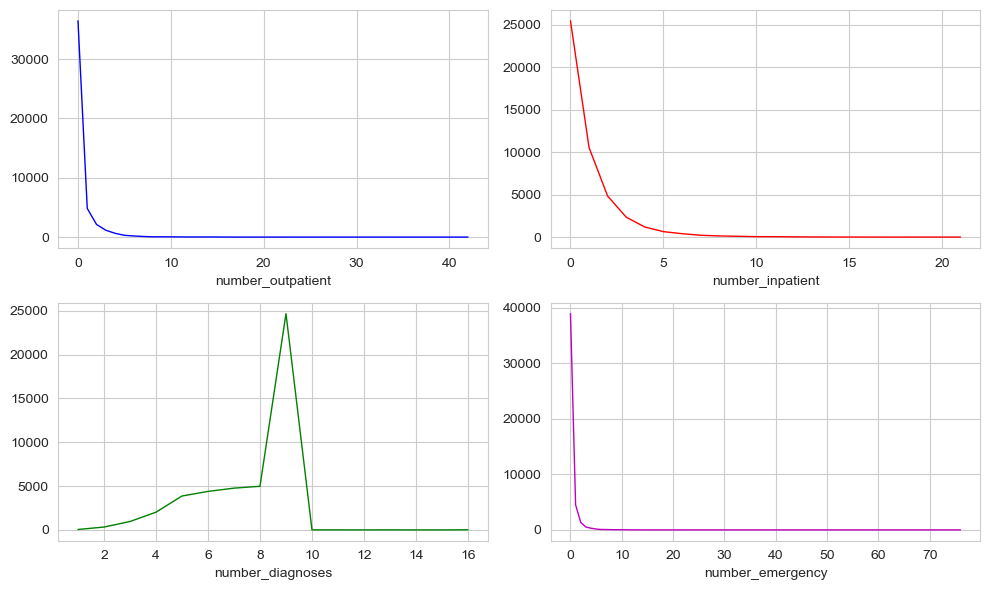

In [113]:
#extracting the plot data
x_var_1 = 'number_outpatient'
x_var_2 = 'number_inpatient'
x_var_3 = 'number_diagnoses'
x_var_4 = 'number_emergency'
plot_data_1 = generate_plot_data(x_var_1, data_eda_num)
plot_data_2 = generate_plot_data(x_var_2, data_eda_num)
plot_data_3 = generate_plot_data(x_var_3, data_eda_num)
plot_data_4 = generate_plot_data(x_var_4, data_eda_num)

#plotting
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(nrows = 2, ncols=2, figsize = (10,6))

ax_1.plot(plot_data_1[x_var_1],
         plot_data_1['y'],
         'b',
         linewidth=1)

ax_2.plot(plot_data_2[x_var_2],
         plot_data_2['y'],
         'r',
         linewidth=1)
ax_3.plot(plot_data_3[x_var_3],
         plot_data_3['y'],
         'g',
         linewidth=1)

ax_4.plot(plot_data_4[x_var_4],
         plot_data_4['y'],
         'm',
         linewidth=1)

ax_1.set_xlabel(x_var_1)
ax_2.set_xlabel(x_var_2)
ax_3.set_xlabel(x_var_3)
ax_4.set_xlabel(x_var_4)

plt.tight_layout()

plt.savefig('./figs/num_2_v_readmit.png')
plt.show()